In [4]:
def catchError(function):

    def wrapper(x, plus):
        try:
            print("Запуск")
            function(x, plus)
            print("Успешно")
        except ValueError as e:
            print("Ошибка с значением:", e)
        except TypeError as e:
            print("Ошибка с типами:", e) 
        except Exception as e:
            print("Ошибка:", e)
    return wrapper

@catchError
def myFunction(x, plus):
    x += plus
    print(x)
    return x

myFunction("a",9)

Запуск
Ошибка с типами: can only concatenate str (not "int") to str


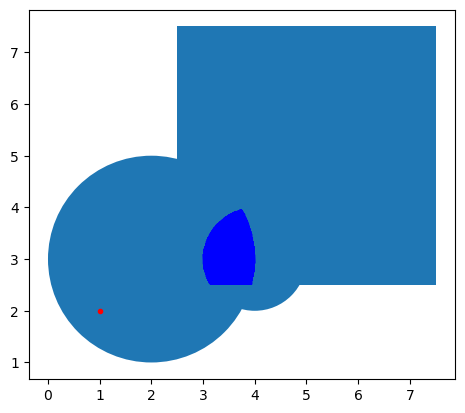

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


class Point:

    def __init__(self, x = 0, y = 0):
        self.x0 = x
        self.y0 = y

    def draw(self, ax):
        self.__ax = ax
        ax.plot(self.x0, self.y0, marker=".", color="r")   

    def getX(self):
        return self.x0    
    
    def getY(self):
        return self.y0

class Shape(Point):

    def __init__(self, x = 0, y = 0):
        super().__init__(x, y)

    def draw(self, ax):
        super().draw(ax)


    def is_inside(self, point = Point(0, 0)):
        if super().getX() == point.getX() and super().getY() == point.getY():
            return True
        else:
            return False

class Circle(Shape):
    
    def __init__(self, x0 = 0, y0 = 0, R = 0):
        self.x0 = x0
        self.y0 = y0
        self.R = R
        super().__init__(x0, y0)

    def draw(self, ax):
        circle = plt.Circle((self.x0, self.y0), self.R)
        ax.add_patch(circle)
        return circle
        
    def is_inside(self, point = Point(0, 0)):
        dx = abs(self.x0 - point.getX())
        dy = abs(self.y0 - point.getY())
        if (dx ** 2 + dy ** 2) ** (1/2) <= self.R:
            return True
        else:
            return False
            


class Square(Shape):

    def __init__(self, x0 = 0, y0 = 0, h = 0):
        self.x0 = x0
        self.y0 = y0
        self.h = h
        super().__init__(x0, y0)

    def draw(self, ax):
        square = plt.Rectangle((self.x0 - self.h / 2, self.y0 - self.h / 2), self.h, self.h)
        ax.add_patch(square)
        return square.get_patch_transform()

    def is_inside(self, point = Point(0, 0)):
        pointUpRight = Point(self.x0 + self.h / 2, self.y0 + self.h / 2)   
        pointDownRight = Point(self.x0 + self.h / 2, self.y0 - self.h / 2)  
        pointUpLeft = Point(self.x0 - self.h / 2, self.y0 + self.h / 2)  
        pointDownLeft = Point(self.x0 - self.h / 2, self.y0 - self.h / 2)  
        if ((point.getX() > pointUpLeft.getX() and point.getY() < pointUpLeft.getY()) and
            (point.getX() < pointDownRight.getX() and point.getY() > pointDownRight.getY())):
            return True
        else:
            return False



class Union(Shape):

    def __init__(self, shapes = [Circle(0, 0, 0)]):
        self.shapes = shapes

    def draw(self, ax):
        for shape in self.shapes:
            shape.draw(ax)

    def is_inside(self, point = Point(0, 0)):
        listInside = []
        for shape in self.__shapes:
            listInside.append(shape.is_inside(point))
        for inside in listInside:
            if inside == True:
                return True
            else:
                continue
        return False



class Intersection(Shape):

    def __init__(self, shapes = [Circle(0, 0, 0)]):
        self.shapes = shapes
        
    def minmax(self, shapes = [Circle(0, 0, 0)]):
        min = Point(9999, 9999)
        max = Point(-9999, -9999)
        for shape in shapes:
            pointUpRight = Point()
            pointDownLeft = Point()


            if type(shape) == Circle:
                pointUpRight = Point(shape.x0 + shape.R, shape.y0 + shape.R) 
                pointDownLeft = Point(shape.x0 - shape.R, shape.y0 - shape.R)
            if type(shape) == Square:
                pointUpRight = Point(shape.x0 + shape.h / 2, shape.y0 + shape.h / 2) 
                pointDownLeft = Point(shape.x0 - shape.h / 2, shape.y0 - shape.h / 2)    


            if pointDownLeft.x0 <= min.x0 and pointDownLeft.y0 <= min.y0:
                min.x0 = pointDownLeft.x0
                min.y0 = pointDownLeft.y0

            if pointUpRight.x0 >= max.x0 and pointUpRight.y0 >= max.y0:
                max.x0 = pointUpRight.x0
                max.y0 = pointUpRight.y0   
    
        return [min, max]         

    def draw(self, ax):
        minmax = self.minmax(self.shapes)

        x = np.linspace(minmax[0].x0, minmax[1].x0, 500)
        y = np.linspace(minmax[0].y0, minmax[1].y0, 500)
        
        x1 = []
            
        for x0 in x:
            for y0 in y:
                flag = True
                for shape in self.shapes:
                    if shape.is_inside(Point(x0, y0)) == False:
                        flag = False
                        break
                if flag == True:
                    x1.append([x0, y0])
        
        ax.add_patch(Polygon(x1, hatch="|", color='blue'))


            # self.__shapes[i].draw(ax)

    def is_inside(self, point = Point(0, 0)):
        listInside = []
        for shape in self.shapes:
            listInside.append(shape.is_inside(point))
        for inside in listInside:
            if inside == True:
                continue
            else:
                return False
        return True        










fig, axs = plt.subplots(1)

point = Point(1, 2)
point.draw(axs)

cir = Circle(2, 3, 2)
cir.draw(axs)
# print(cir.is_inside(point))

cir2 = Circle(4, 3, 1)
cir2.draw(axs)

sqr = Square(5, 5, 5)
sqr.draw(axs)

# print(sqr.is_inside(point))

# ussr = Union([cir, sqr])
# ussr.draw(axs)
# print(ussr.is_inside(point))

inter = Intersection([cir, sqr, cir2])
inter.draw(axs)

# point = Shape(1, 1).draw(axs)
axs.axis('scaled')
# axs[1].axis('scaled')
plt.show()